# Calories prediction from macronutrients and sodium

This is a school project from the *"Maths and Data Science for Decision Making"* course. It is a simple model that aims to predict the number of calories (kcal) that a person consumes based on his or her carbohydrate (g), fats (g), protein (g) and sodium (mg) consumption.

The data is mine and I have used it for the project, is the consume of calories, macros and sodium for a period of 12 weeks.

The model is a multiple linear regression model with the variables:
- **carbohydrate**: the number of grams of carbohydrate consumed per product
- **fats**: the number of grams of fats consumed per product
- **protein**: the number of grams of protein consumed per product
- **sodium**: the number of milligrams of sodium consumed per product

In [3]:
# All the libraries are loaded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [10]:
# Load the database
path = "./database_cal.csv"
df = pd.read_csv(path)
print(f"There are {len(df)} rows in the database")
print(df.head())

There are 420 rows in the database
                         Nombre  Calories (kcal)  Carbohydrates (g)  Fats (g)  \
0                Licuado tipico           241.10              39.30      7.00   
1                      Vive 100           125.00              28.00      0.00   
2                   1/2 mollete           237.50              27.50     10.00   
3                        Gringa           520.80              30.00     34.00   
4  Comida (frij, bist, quesadi)           718.09              64.85     32.15   

   Proteins (g)  Sodium (mg)  
0          7.15       160.00  
1          0.00       150.00  
2         10.00       436.25  
3         24.80       509.20  
4         37.24       489.64  


In [11]:
# Mantain the dataframe with only the columns we need
df = df.select_dtypes(include=np.number)
# Verify the percentage of NaN values
print(df.isna().sum() / len(df)*100)

Calories (kcal)      0.0
Carbohydrates (g)    0.0
Fats (g)             0.0
Proteins (g)         0.0
Sodium (mg)          0.0
dtype: float64


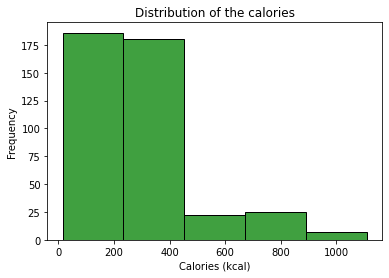

In [80]:
# Represent the consumption of calories
sns.histplot(df["Calories (kcal)"], bins=5, kde=False, color="green")
plt.title("Distribution of the calories")
plt.xlabel("Calories (kcal)")
plt.ylabel("Frequency")
plt.show()


Text(0, 0.5, 'Frequency')

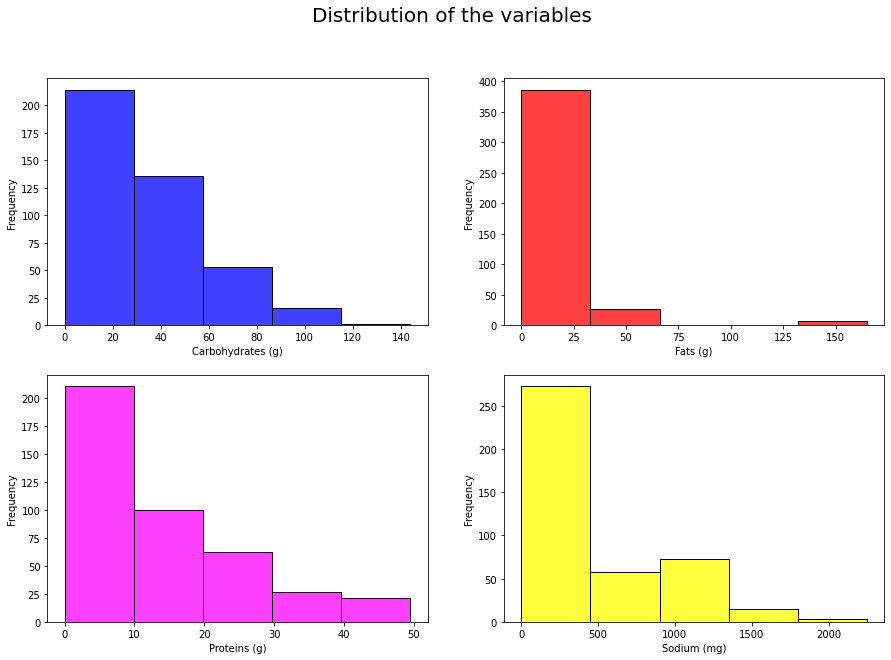

In [46]:
# Represent the consumption of all variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of the variables", fontsize=20)

sns.histplot(df["Carbohydrates (g)"], bins=5, kde=False, color="blue", ax=axes[0, 0])
axes[0, 0].set_xlabel("Carbohydrates (g)")
axes[0, 0].set_ylabel("Frequency")

sns.histplot(df["Fats (g)"], bins=5, kde=False, color="red", ax=axes[0, 1])
axes[0, 1].set_xlabel("Fats (g)")
axes[0, 1].set_ylabel("Frequency")

sns.histplot(df["Proteins (g)"], bins=5, kde=False, color="magenta", ax=axes[1, 0])
axes[1, 0].set_xlabel("Proteins (g)")
axes[1, 0].set_ylabel("Frequency")

sns.histplot(df["Sodium (mg)"], bins=5, kde=False, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel("Sodium (mg)")
axes[1, 1].set_ylabel("Frequency")

In [51]:
# Normalize the data with Single Feature Scaling
df_norm = df / df.max()
print(df_norm.head())

   Calories (kcal)  Carbohydrates (g)  Fats (g)  Proteins (g)  Sodium (mg)
0         0.217207           0.272917  0.042424      0.144444     0.071111
1         0.112613           0.194444  0.000000      0.000000     0.066667
2         0.213964           0.190972  0.060606      0.202020     0.193889
3         0.469189           0.208333  0.206061      0.501010     0.226311
4         0.646928           0.450347  0.194848      0.752323     0.217618


<AxesSubplot:>

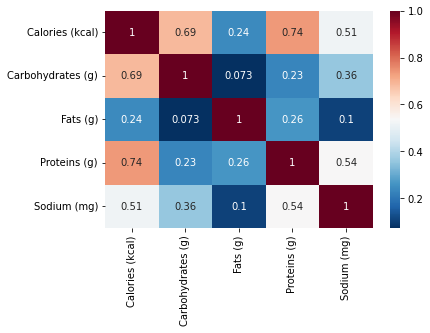

In [63]:
# See the correlation between the variables to consider the variables with the highest correlation
sns.heatmap(df_norm.corr(), annot=True, cmap="RdBu_r")

In [68]:
# Select the x (carbohydrates, fats, proteins, sodium) and y (calories) variables
variables = []
for column in df_norm.columns:
    if column != "Calories (kcal)":
        variables.append(column)
x = df_norm[variables]
y = df_norm["Calories (kcal)"]
print(x.head())

   Carbohydrates (g)  Fats (g)  Proteins (g)  Sodium (mg)
0           0.272917  0.042424      0.144444     0.071111
1           0.194444  0.000000      0.000000     0.066667
2           0.190972  0.060606      0.202020     0.193889
3           0.208333  0.206061      0.501010     0.226311
4           0.450347  0.194848      0.752323     0.217618


In [71]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=84) # 84 is the seed
print(f"There are {len(x_train)} rows in the train set")
print(f"There are {len(x_test)} rows in the test set")

There are 336 rows in the train set
There are 84 rows in the test set


In [79]:
# Train the model
linreg = linear_model.LinearRegression(fit_intercept=False) # False because if there isn't consumption there aren't calories
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
correlation = linreg.score(x_test, y_test)
r2 = metrics.r2_score(y_test, y_pred)
print(f"The correlation is {correlation}")
print(f"The R2 is {r2}")
print("The coefficients are:")
print(f"{linreg.coef_[0]:.4f} for Carbohydrates")
print(f"{linreg.coef_[1]:.4f} for Fats")
print(f"{linreg.coef_[2]:.4f} for Proteins")
print(f"{linreg.coef_[3]:.4f} for Sodium")
print(f"{linreg.intercept_} for the Intercept")
print(f"So formula is Calories = {linreg.coef_[0]:.4f}*x1 + {linreg.coef_[1]:.4f}*x2 + {linreg.coef_[2]:.4f}*x3 + {linreg.coef_[3]:.4f}*x4 + {linreg.intercept_}")


The correlation is 0.870791129858678
The R2 is 0.870791129858678
The coefficients are:
0.6374 for Carbohydrates
0.0707 for Fats
0.4634 for Proteins
0.0055 for Sodium
0.0 for the Intercept
So formula is Calories = 0.6374*x1 + 0.0707*x2 + 0.4634*x3 + 0.0055*x4 + 0.0
